# Software for Data Science - Coursework 01 - Resit
# Akama Emmanuel Ovokerie (S2229758)

ATTESTATION: I confirm that the material contained within the submitted coursework is my own work

---



# TITLE - **Exploratory Data Analysis of House Sales in King County (USA)**

The report documented in this notebook is an exploration of the sales of residential house properties in King county between 2014 and 2015, using the house prices dataset that describes the sale of individual properties in King Country, USA. For more information on this dataset, see for example: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data.

The objective of the report is to perform the preprocessing steps required to explore the dataset using statistical and visualisation techniques available in *Python* (and it's associated library packages).

# INTRODUCTION

When we model the linear relationship between a set of features and a single target variable, the model is called simple linear regression. For this use-case, we want to predict the sale price of residential house properties and a set of intrinsic housing and neighbourhood features, such as bedrooms, bathrooms and zipcodes. However, the objective of the report is to perform the preprocessing steps required to explore the dataset using statistical and visualisation techniques available in *Python*.

Although, the focus of this report is not entirely centered on scientific data models such as regression, classification or clustering, we will be using some of these techniques to guide our analysis while performing the actual exploration of the data with descriptive statistics and visualisation charts.

# DATA EXPLORATION



In order to perform data analysis on the dataset, we need to setup the development environment. Since we will be performing the data analysis in *Python*, we will first import the relevant modules to ingest, wrangle, visually analyse the data with modules like *Pandas*, *Seaborn* and *MatplotLib*.

In [1]:
# import python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

## Data Ingestion
We will ingest the dataset from *Google Drive* for the following reasons;
*   First, since we're working in *Google Colab*, it makes sense to store the dataset in an integrated repository for faster retrieval
*   Secondly, it provides an enormous storage capacity to store large datasets without any impact on local resources.

In [2]:
# mount Google Drive (with permission)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# get the storage location on Google Drive
source_path = '/content/drive/My Drive/Colab Notebooks/SfDS/Assessments/CW 01/Datasets'

# list the files and folders
print('\nList of files and folders on: ', source_path)
!ls '/content/drive/My Drive/Colab Notebooks/SfDS/Assessments/CW 01/Datasets'


List of files and folders on:  /content/drive/My Drive/Colab Notebooks/SfDS/Assessments/CW 01/Datasets
house_data.csv	Housing_1.txt  Housing_2.txt  Housing_Data_Dictionary.txt


To ingest the dataset, we will use the *pandas.read_csv()* [1] method read a comma-separated values (csv) file into dataframe

In [4]:
# load the dataset
df = pd.read_csv(source_path + '/house_data.csv')

After loading a dataset for analysis, it is often customary to review it to understand the structure of the data.

To kick-off the preliminary analysis of the data, we will begin by reviewing the dimensionality with *pandas.shape* [2]

In [5]:
# preview the data structure
df.shape

(21615, 21)

Next, we will use the *pandas.info()* [3] method to get a concise summary of the dataset, including the index datatype and columns, as well as, the non-null values and memory usage

In [6]:
# preview the data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21615 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21615 non-null  int64  
 1   date           21615 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21615 non-null  int64  
 4   bathrooms      21615 non-null  float64
 5   sqft_living    21615 non-null  int64  
 6   sqft_lot       21615 non-null  int64  
 7   floors         21615 non-null  float64
 8   waterfront     21615 non-null  int64  
 9   view           21615 non-null  int64  
 10  condition      21615 non-null  int64  
 11  grade          21615 non-null  int64  
 12  sqft_above     21615 non-null  int64  
 13  sqft_basement  21615 non-null  int64  
 14  yr_built       21615 non-null  int64  
 15  yr_renovated   21615 non-null  int64  
 16  zipcode        21615 non-null  int64  
 17  lat            21615 non-null  float64
 18  long  

Since we will be performing further exploratory analysis on the data, it makes sense to create a data dictionary that describes the structure of the dataset so we can refer to it later on.

1. ***id*** (discrete, ordinal) - Unique ID for each home sold
2. ***date*** (discrete, ordinal) - Date of the home sale
3. ***price*** (continuos, ordinal, target) - Price of each home sold
4. ***bedrooms*** (discrete, ordinal) - Number of bedrooms
5. ***bathrooms*** (discrete, ordinal) - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. ***sqft_living*** (discrete, ordinal) - Square footage of the apartments interior living space
7. ***sqft_lot*** (discrete, ordinal) - Square footage of the land space
8. ***floors*** (discrete, ordinal) - Number of floors
9. ***waterfront*** (discrete, nominal) - A dummy variable for whether the apartment was overlooking the waterfront or not
10. ***view*** (discrete, ordinal) - An index from 0 to 4 of how good the view of the property was
11. ***condition*** (discrete, ordinal) - An index from 1 to 5 on the condition of the apartment,
12. ***grade*** (discrete, ordinal) - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13. **sqft_above** (discrete, ordinal) - The square footage of the interior housing space that is above ground level
14. ***sqft_basement*** (discrete, ordinal) - The square footage of the interior housing space that is below ground level
15. ***yr_built*** (discrete, ordinal) - The year the house was initially built
16. ***yr_renovated*** (discrete, ordinal) - The year of the house’s last renovation
17. ***zipcode*** (discrete, nominal) - What zipcode area the house is in
18. ***lat*** (continuos, nominal) - Lattitude
19. ***long*** (continuos, nominal) - Longitude
20. ***sqft_living15*** (continuos, ordinal) - The square footage of interior housing living space for the nearest 15 neighbors
21. ***sqft_lot15*** (continuos, ordinal) - The square footage of the land lots of the nearest 15 neighbors

Source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx

## Data Overview

After loading a dataset, it is important to explore various aspects of the data to gain insights into its structure, characteristics, and potential issues that might need to be resolved before proceding with further analysis. Then, we we shall consider further preprocessing steps to handle the duplicate missing and/or extreme values.

However, in this section, we will perform a general review of the data by taking a samples of the first and last observations of the data. Next, we will take a deeper look into the data attributes of the dataset. We will also peep to see if there are missing entries in the data.

In [7]:
# preview the data
# NB: the pandas.head() method previews the first 10 observations of the data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,NaN,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238.0,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650.0,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780.0,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390.0,7570


In [8]:
# preview the data
# NB: the pandas.tail() method previews the last 10 observations of the data
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21605,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270.0,5731
21606,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400.0,1230
21607,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520.0,6023
21608,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050.0,6200
21609,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330.0,1265
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287
21614,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020.0,1357


## Data Cleaning/Preprocessing

Previewing the dataset provides us with a chance to perform some cleanup to preprecess the data for analysis.

Our first step to cleaning up the data will be to check for duplicate entries in the data. For this, we will use the *pandas.drop_duplicates()* [4] method to remove duplicate entries in the data

In [9]:
# remove duplicates in the data
df.drop_duplicates()

# check for changes
df.shape

(21615, 21)

Next, we will perform a count of missing entries. This will provide guidiance of the next preprocessing steps to take.

For this, we will use the *pandas.isna()* [5] method to extract the observations having missing entries. Next, we will use the *pandas.sum()* [6] method to obtain the count of missing observations in each of the feature coulumns


In [10]:
# get the count of missing entries
df.isna().sum()

id               0
date             0
price            6
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    4
sqft_lot15       0
dtype: int64

A review of missing entries indicate that there are six (6) *price* entries, and four (4) missing *sqft_living15* entries.

In both cases, we will input zero (0) rather than completely delete the observation. For *price*, we can assume that the ownership of the house was transfered rather than sold. Similarly, for *sqft_living15*, we can assume that the property is in an isolated location, completely away from neighbours

In [11]:
# input zero (0) for missing entries
df['price'].fillna(value=0, inplace=True)
df['sqft_living15'].fillna(value=0, inplace=True)

# check for changes
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Next, we will convert the *bathrooms* and *floors* to a natural integer data types

In [12]:
# represent the data in their natural data types
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

Lastly, we will remove unneccessary identity features, including *id*, *lat*, and *long*.

We leave *zipcode* as it can be used to perform further analysis of house prices within particular locality

In [13]:
# remove unnecessary columns
df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

Now that we have confirmed that the data is well represented with no missing entries. We will check the data again to see it's in order

In [14]:
# preview the data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340.0,5650
1,20141209T000000,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690.0,7639
2,20150225T000000,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720.0,8062
3,20141209T000000,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360.0,5000
4,20150218T000000,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800.0,7503


## Feature Selection & Engineering

Feature selection and engineering is a preparatory step in data modelling used to select and transform variables of interest for further analysis.

For our use-case, we will transform the *date* column into two (2) columns that reflect the month and year the property was sold as *year_sold* and *month_sold* respectively. we will use the transformation to facilitate a time-series of the residential property sales over time

In [15]:
# format the date column
df['date'] = pd.to_datetime(df['date'])

# engineer new features from the date column
df['yr_sold'] = df['date'].apply(lambda date: date.year)
df['mth_sold'] = df['date'].apply(lambda date: date.month)

# remove redundant columns
df.drop(['date'], axis=1, inplace=True)

# preview the data
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,yr_sold,mth_sold
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340.0,5650,2014,10
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690.0,7639,2014,12
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720.0,8062,2015,2
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360.0,5000,2014,12
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800.0,7503,2015,2


# DATA EXPLORATION AND ANALYSIS

Our exloration and analysis of the dataset will include an analysis on descriptive summary statistics, as well as, data visualisation with univariate and bivariate analysis of the residential sale price


## Summary Statistics

We will begin our Exploratory Data Analysis (EDA) with a review of the descriptive summary statistics of tha dataset. Using descriptive summary statistics as a preliminary analysis for a dataset can provide a quick summary of dataset. This is particularly useful for comparing and analysing the central tendencies of features that make up the dataset. In our use-case, we will use the *pandas.describe()* [7] method to retrieve key statistical parameters such as the mean and standard devation

In [16]:
# preview the descriptive statistics
# NB: we transpose the data so we can view it in long format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21615.0,539931.716771,367226.557551,-20000.0,321000.0,450000.0,645000.0,7700000.0
bedrooms,21615.0,3.370854,0.930032,0.0,3.0,3.0,4.0,33.0
bathrooms,21615.0,1.749711,0.734859,0.0,1.0,2.0,2.0,8.0
sqft_living,21615.0,2079.847467,918.433531,290.0,1426.0,1910.0,2550.0,13540.0
sqft_lot,21615.0,15106.445108,41418.631940,520.0,5040.0,7620.0,10687.5,1651359.0
floors,21615.0,1.446218,0.551889,1.0,1.0,1.0,2.0,3.0
waterfront,21615.0,0.007541,0.086513,0.0,0.0,0.0,0.0,1.0
view,21615.0,0.234282,0.766285,0.0,0.0,0.0,0.0,4.0
condition,21615.0,3.409484,0.650738,1.0,3.0,3.0,4.0,5.0
grade,21615.0,7.656812,1.175461,1.0,7.0,7.0,8.0,13.0


## Data Visualisation

**Univariate Analysis of Sale Price**

Univariate analysis is an essential technique in Exploratory Data Analysis (EDA) that helps to uncover patterns and anomalies ( for example, outliers) about individual variables (in this case, the target variable, *price*) in a dataset.

Since it focuses on a single variable at a time, it can serve as a fundamental step in examining in understanding central tendencies, dispersions, and distributions of an individual variable before diving into more complex multivariate analysis




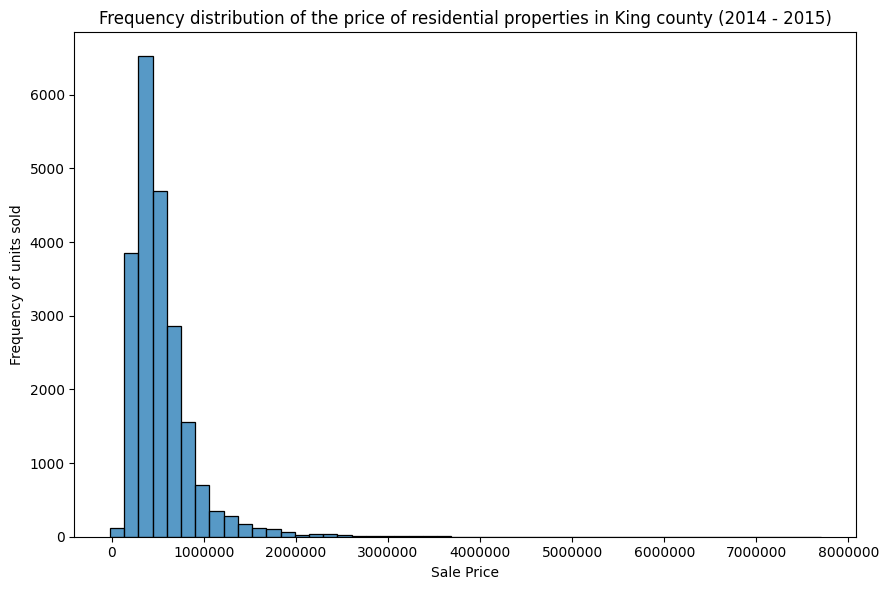

In [17]:
# create a figure for the plot
plt.figure(figsize=(9,6))

# draw a histogram showing the distribution of sale price
sns.histplot(df['price'], bins=50)

# add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency of units sold')
plt.title('Frequency distribution of the price of residential properties in King county (2014 - 2015)')

# show complete scale on x-axis
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

# show the plot
plt.tight_layout()
plt.show()

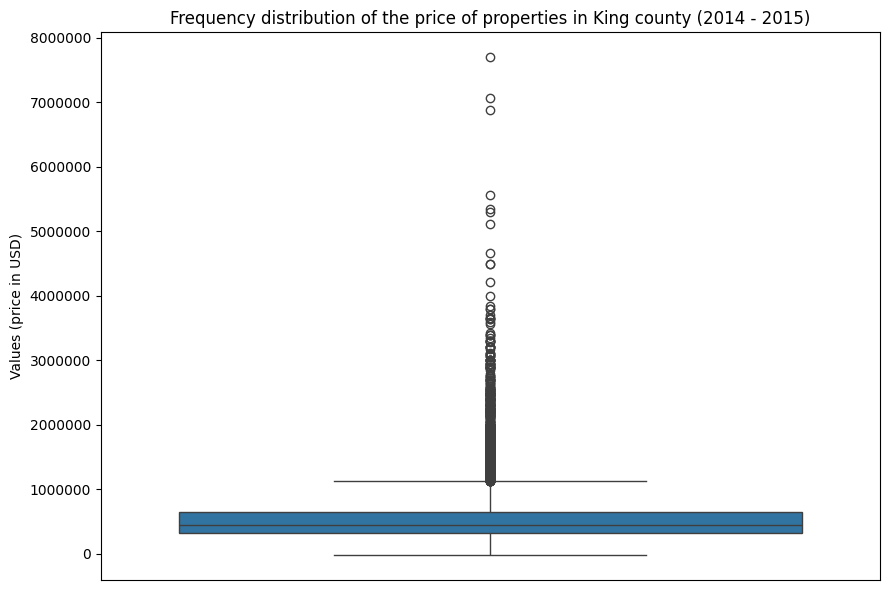

In [18]:
# create a figure for the plot
plt.figure(figsize=(9,6))

# draw a box-plot showing the distribution of sale price
sns.boxplot(df['price'])

# make the x axis label invisible
plt.xticks([])

# add labels and title
plt.ylabel('Values (price in USD)')
plt.title('Frequency distribution of the price of properties in King county (2014 - 2015)')

# show complete scale on y-axis
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# show the plot
plt.tight_layout()
plt.show()

From the frequency distribution indicated by the histogram sale prices above, we could see clearly that properties above 1,000,000 USD were outliers (less than 5% of the total units sold). Also, we could see that the median price of a residential property in King county was approximately 500,000 USD

**Bivariate Analysis of Sale Price with Highly Correlated Features**

Multivariate analysis deals with the interactions and relationships among three or more variables. Whilst in multivariate analysis, more than one parameter is varied simultaneously, bivariate analysis, on the other hand, simultaneously compares two variables.

For our use-case, we will consider an analysis of  *price* with features where the correlation coefficient is greater than 0.5. In addition, we will also consider the bivariate analysis of *price* with time-series a feature like *yr_built*

bathrooms: 0.509923


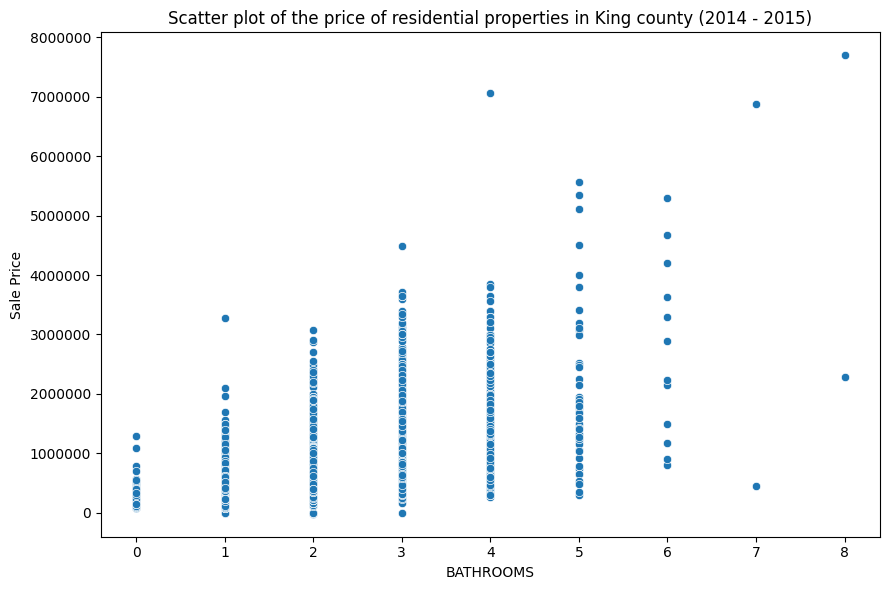

sqft_living: 0.701829


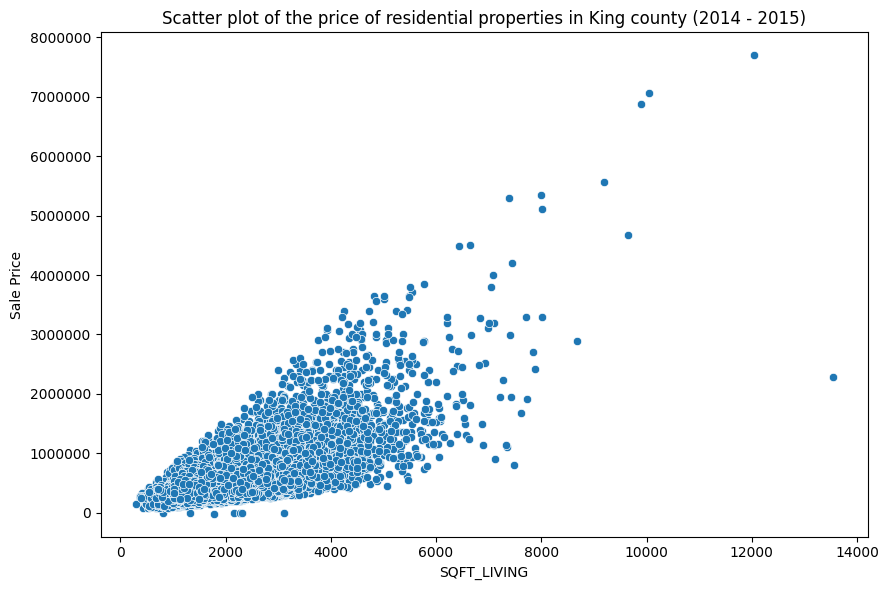

grade: 0.667283


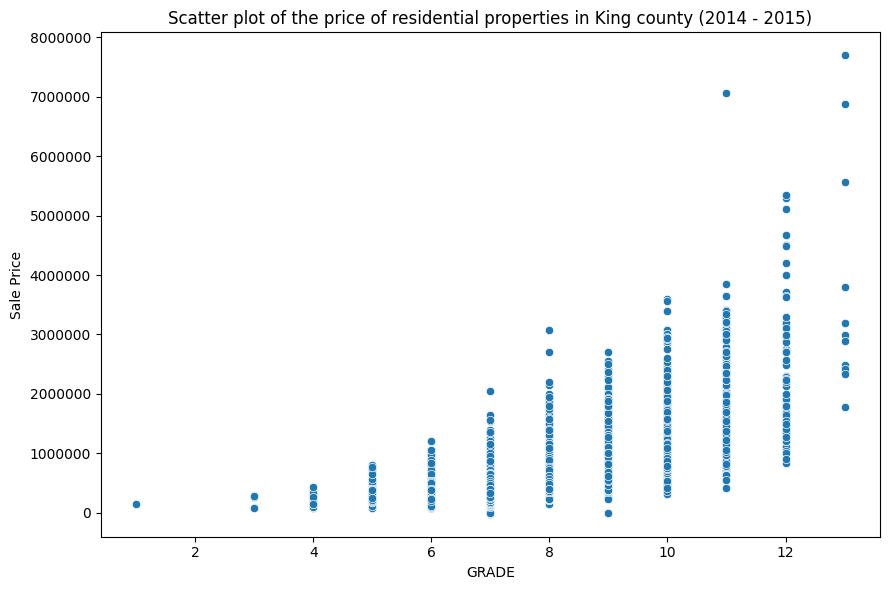

sqft_above: 0.605315


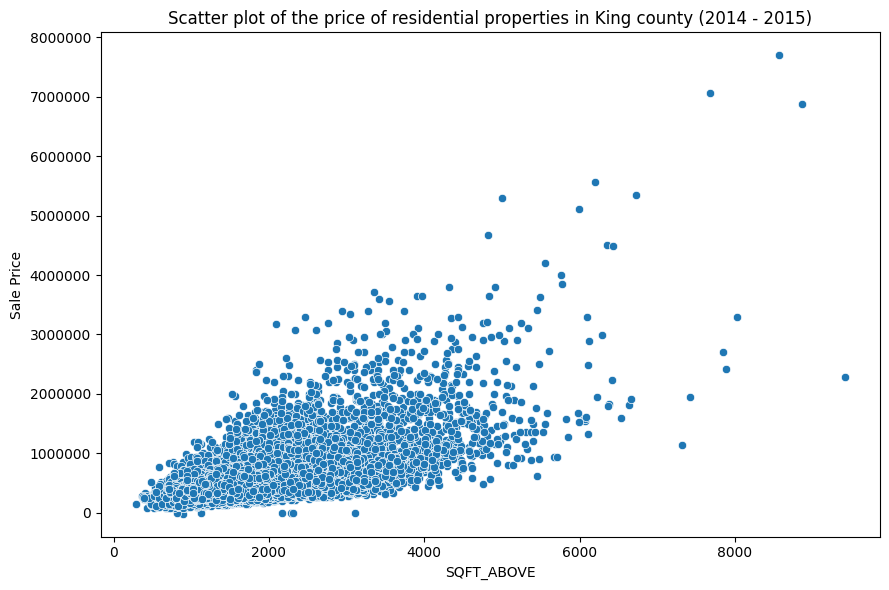

sqft_living15: 0.584154


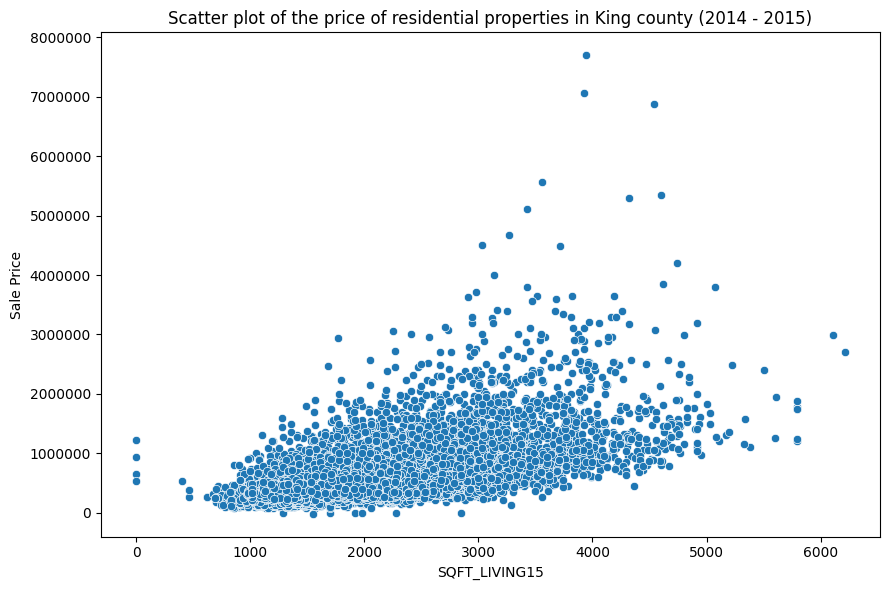

In [19]:
# calculate the correlation to the target
for feature in df.columns.values:
    related = df['price'].corr(df[feature])

    # exclude correlation coefficients <= 0.5
    if related > 0.5 and feature != 'price':
        # show the correlation
        print("%s: %f" % (feature, related))

        # create a figure for the plot
        plt.figure(figsize=(9,6))

        # draw a scatter plot showing the distribution of sale price
        sns.scatterplot(x=df[feature], y=df['price'])

        # add labels and title
        plt.xlabel(str.upper(feature))
        plt.ylabel('Sale Price')
        plt.title('Scatter plot of the price of residential properties in King county (2014 - 2015)')

        # show complete scale on both axes
        formatter = ticker.ScalarFormatter(useOffset=False)
        formatter.set_scientific(False)
        plt.gca().xaxis.set_major_formatter(formatter)
        plt.gca().yaxis.set_major_formatter(formatter)

        # show the plot
        plt.tight_layout()
        plt.show()

From the bivariate analysis depicted in the scatter plots above, we could see there is a direct linear relationship between sale price and highly correlated features, such as *bathrooms* and *grade*. This is an indication that these features can easily be modelled with linear machine learning models like linear regression

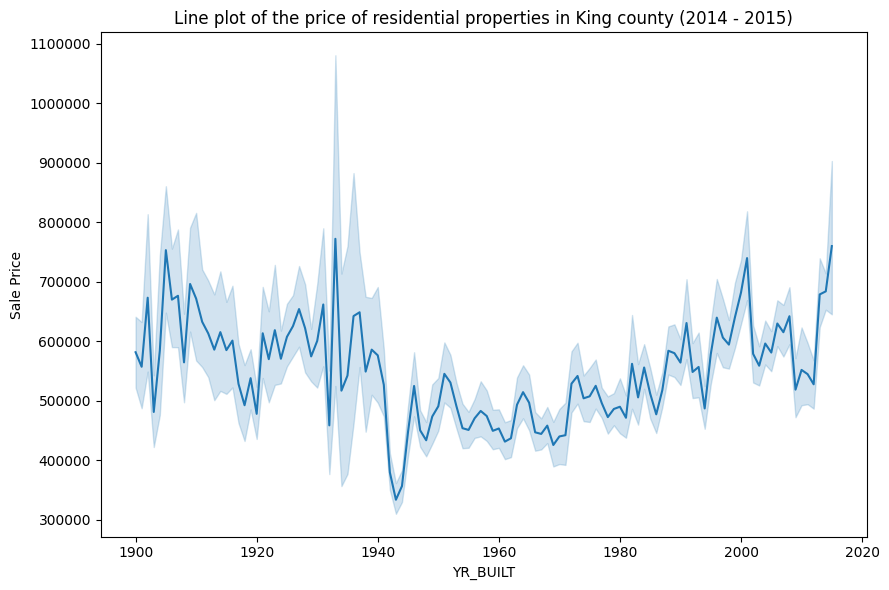

In [20]:
# create a figure for the plot
plt.figure(figsize=(9,6))

# draw a scatter plot showing the distribution of sale price
sns.lineplot(data=df, x=df['yr_built'], y=df['price'])

# add labels and title
plt.xlabel(str.upper('yr_built'))
plt.ylabel('Sale Price')
plt.title('Line plot of the price of residential properties in King county (2014 - 2015)')

# show complete scale on both axes
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# show the plot
plt.tight_layout()
plt.show()

From the time-series line plot, we could see that the sale price residential properties spiked just after the 1900, 1930 and 2010. However, it deeped strongly in the early 1940's

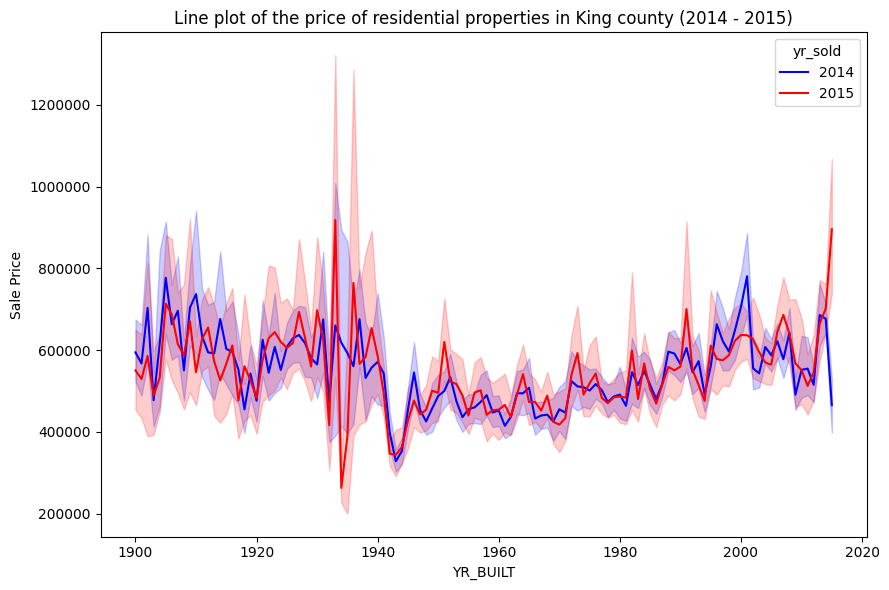

In [55]:
# create a figure for the plot
plt.figure(figsize=(9,6))

# draw a scatter plot showing the distribution of sale price
sns.lineplot(data=df, x=df['yr_built'], y=df['price'], hue=df['yr_sold'], palette=['blue','red'])

# add labels and title
plt.xlabel(str.upper('yr_built'))
plt.ylabel('Sale Price')
plt.title('Line plot of the price of residential properties in King county (2014 - 2015)')

# show complete scale on both axes
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().collections[0].set_path_effects([])

# show the plot
plt.tight_layout()
plt.show()

In [57]:
x= df.groupby('yr_built')['price'].mean()
x.astype(int)

yr_built
1900    581387
1901    556935
1902    673007
1903    480958
1904    583756
         ...  
2011    544522
2012    527447
2013    678545
2014    683681
2015    759785
Name: price, Length: 116, dtype: int64

As we can see, there were some disparities in the sale prices of residential properties sold in 2014 and 2015. However, there was a steady rise in the sale prices of the properties. This is particularly noticable between 2010 and 2015

# RESULTS AND DISCUSSION

We make the following observations from the descriptive summary statistics, as well as, the univariate and bivariate analysis.

1. The sale price of most of the residential properties is less than 1,000,000 USD
2. There's a direct linear relationship between strongly correlated features such as *sqft_living*, *grade*, and *sqft_above*. Hence, these features can easliy be modeled with linear machine learning models such as Linear Regression
3. Lastly,  we observed that the sale price residential properties spiked just after the 1900, 1930 and early 2000's. However, it deeped strongly in the early 1940's and rose steadily therefter. Although, the reason for these spikes could not be ascertained, there are chances that there would have have been a large margin of profits and losses during these times


# REFERENCES

[1] *pandas.read_csv()* method, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

[2] *pandas.shape*, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

[3] *pandas.info()* method, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

[4] *pandas.drop_duplicates()* method, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

[5] *pandas.isna()* method, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

[6] *pandas.sum()* method, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

[7] *pandas.describe()* method, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

